In [1]:
%matplotlib inline
 
import matplotlib.pyplot as plt
import numpy as np
import os
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [2]:
import pickle
import joblib
from skimage.io import imread
from skimage.transform import resize
# (10 pkt.)
# Funkcja do przerabiania obrazków na dane wejściowe

# Output - Słownik z przerobionymi obrazami na dane wejściowe zapisz do pliku 
# [nazwa]_[szerokosc]x[wysokosc]px.pkl - aby na przyszlosc pamietac, do jakich rozmiarow zmienilismy obrazki

def resize_all(src, pklname, include, width=150, height=None):
    
    """
    Parameter
    ---------
    src: str
        ściezka do folderu głównego z obrazkami
    pklname: str
        nazwa pliku wyjściowego
    width: int
        docelowa szerokość obrazków 
    include: set[str]
        set zawierający nazwy klas, które chcemy dodać
    """
    # Jeśli height nie jest zdefiniowane to przyjmujemy, ze obraz jest kwadratem
    if (height == None): height = width
    
    data = {}
    data['description'] = f"Resized images of {include} to {width}x{height}"
    data['label'] = []
    data['filename'] = []
    data['data'] = []  

    for folder in os.listdir(src):
        if (any(folder == includedfolder + "Head" for includedfolder in include)):
            for img in os.listdir(os.path.join(src, folder)):
                data['label'].append(folder.replace('Head', ''))
                data['filename'].append(img)
                data['data'].append(resize(imread(os.path.join(src, folder, img)), (width, height)))
     
    pklname = f"{pklname}_{width}x{height}px.pkl"
    file = open(pklname, 'wb')
    pickle.dump(data, file)
    file.close()
 
    # Przechodzimy się po folderze głownym
    # Nastepnie przechodzimy się po folderach wewnątrz
    # Nastepnie przechodzimy się po zdjęciach
    # Jeśli zdjęcie jest jpg lub png
    # to Dzialamy na nie funkcją imread
    # potem dzialamy funkcją resize
    # Do słownika dodajemy nazwę klasy
    # Do słownika dodajemy nazwę pliku
    # Do słownika dodajemy odczytany i pomniejszony obraz
    # Cały słownik "piklujemy"

In [3]:
# (5 pkt.)

src = 'Image'
pkl_name = "test1"
width = 80
include = {'Chicken', 'Bear', 'Elephant', 
           'Eagle', 'Deer', 'Monkey', 'Panda'}
 
# wywołaj funkcję - resize_all
resize_all(src, pkl_name, include, width)


In [4]:
from collections import Counter
# (5 pkt.)
# Załaduj "zapiklowany" plik

with open('test1_80x80px.pkl', 'rb') as f:
    data = pickle.load(f)
# Wypisz informacje o zapiklowanym słowniku
 
print('Ilość próbek:', len(data['data']))
print('Klucze zapiklowanego słownika:', data.keys())
print('Shape pojedynczego zdjęcia:', data['data'][0].shape)
print('Labels:', data['label'])
print('Liczba klas:', Counter(data['label']))

# Napisz w komentarzu, co odpowiada za shape zdjęcia
# shape(width, height, color)

Ilość próbek: 724
Klucze zapiklowanego słownika: dict_keys(['description', 'label', 'filename', 'data'])
Shape pojedynczego zdjęcia: (80, 80, 3)
Labels: ['Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Chicken', 'Chicken', 'Chicken', 'Chic

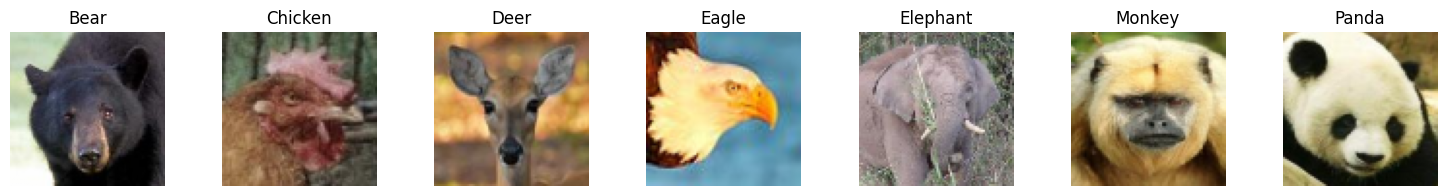

In [5]:
# Printowanie zdjęć (po jednym z kadej klasy)
# (5 pkt.)
# unikalna lista klas
labels = Counter(data['label']).keys()
 
# Ustawienia matplot lib
fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)
fig.tight_layout()
 

# Dla kazdego utworzonego wcześniej pustego okienka na zdjęcie oraz podpis pod nim:
for ax, label in zip(axes, labels):

    # W miejscu komentarza któreś ze zdjęć danej klasy
    ax.imshow(data['data'][data['label'].index(label)])
    ax.axis('off')
    ax.set_title(label)

In [6]:
# Utwórz zbiór cech oraz klas
# (pkt.)
X = data['data']
y = data['label']

In [7]:
# (2 pkt.)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# Podziel zbiory na treningowy oraz testowy za pomocą gotowej funkcji (poprzednie zajęcia)

<AxesSubplot: >

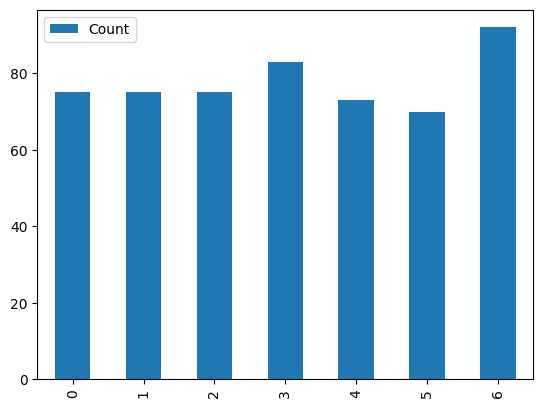

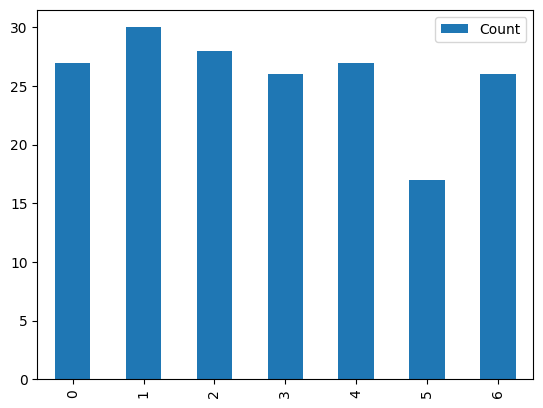

In [8]:
# (5 pkt.)
import pandas as pd

pd.DataFrame(Counter(y_train).items(), columns=['Label', 'Count']).plot.bar()

pd.DataFrame(Counter(y_test).items(), columns=['Label', 'Count']).plot.bar()

# Pokaz za przy pomocy pandas i matplotlib wykresy, na którym widoczna będzie ilość próbek dla kazdej klasy (czy zbior jest zbalansowany?)
# Utwórz osobne wykresy dla train i test

In [9]:
# Jedynie uruchomić - nie zmieniać 

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import SGDClassifier
from skimage.feature import hog
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, Normalizer
import skimage
 
class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
    """
    Konwertuje RGB do Gray
    """
 
    def __init__(self):
        pass
 
    def fit(self, X, y=None):
        """returns itself"""
        return self
 
    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array([skimage.color.rgb2gray(img) for img in X])
     
 
class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Hog features - przyjmuje obrazy juz z 1 channel-em
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])

 
# create an instance of each transformer
grayify = RGB2GrayTransformer()
hogify = HogTransformer(
    pixels_per_cell=(14, 14), 
    cells_per_block=(2,2), 
    orientations=9, 
    block_norm='L2-Hys'
)
scalify = StandardScaler()

In [10]:

# (5 pkt.)

# Aby dane mogły być danymi wejściowymi do modelu
# Nalezy najpierw:
#  1. Przetransponować je na skalę szarości
#  2. "Usunąć ze zdjęcia nadmiar szczegółów" za pomocą HOG
#  3. Znormalizować dane

X_train_gray = grayify.fit_transform(X_train)
X_train_hog = hogify.fit_transform(X_train_gray)
X_train_prepared = scalify.fit_transform(X_train_hog)
 
print(X_train_prepared.shape)

(543, 576)


In [11]:
# (5 pkt.)

sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
# Wytrenuj model
sgd_clf.fit(X_train_prepared, y_train)

###

SGDClassifier(random_state=42)

In [12]:
# (5 pkt.)

### Zmodyfikuj zbiór testowy, aby był tak samo zmodyfikowany jak zbiór treningowy i dokonaj predykcji
X_test_gray = grayify.fit_transform(X_test)
X_test_hog = hogify.fit_transform(X_test_gray)
X_test_prepared = scalify.fit_transform(X_test_hog)
pred = sgd_clf.predict(X_test_prepared)

In [13]:
# (5 pkt.)
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, plot_roc_curve, f1_score

## precision, recall, f1, confusion_matrix, Accuracy
precision_score(y_test, pred, average='micro')
recall_score(y_test, pred, average='micro')
f1_score(y_test, pred, average='micro')
confusion_matrix(y_test, pred)

array([[23,  0,  0,  1,  0,  2,  0],
       [ 0, 15,  0,  0,  0,  2,  0],
       [ 0,  1, 26,  0,  1,  0,  0],
       [ 0,  2,  0, 22,  1,  1,  0],
       [ 1,  0,  1,  0, 27,  1,  0],
       [ 0,  1,  0,  0,  1, 23,  2],
       [ 0,  0,  0,  0,  0,  0, 27]], dtype=int64)

In [28]:
# (10 pkt.)

## Znajdź w sieci 10 obrazków zwierząt, a następnie dokonaj na nich predykcji wcześniej wytrenowanym modelem
src = 'TestImages'
pkl_name = "testimages"
width = 80
include = {'Chicken', 'Bear', 'Elephant', 
           'Eagle', 'Deer', 'Monkey', 'Panda'}
 
resize_all(src, pkl_name, include, width)

with open('testimages_80x80px.pkl', 'rb') as f:
    newdata = pickle.load(f)

X_new = data['data']
Y_new = data['label']

X_new_gray = grayify.fit_transform(X_new)
X_new_hog = hogify.fit_transform(X_new_gray)
X_new_prepared = scalify.fit_transform(X_new_hog)
pred = sgd_clf.predict(X_new_prepared)

precision_score(Y_new, pred, average='micro')
recall_score(Y_new, pred, average='micro')
f1_score(Y_new, pred, average='micro')
confusion_matrix(Y_new, pred)

0.9792817679558011